In [161]:
#importing Libraries
import tweepy
import datetime
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re
import itertools
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import math

In [162]:
#Class with functions to download tweets by giving user name of twitter
#link of reference: https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25
class Miner(object):

    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        'j1sBofwghy0pXDX6odvWmnvFG',
        'consumer_secret':     'rsW0UUxNbt0OpfdDLQMwuvlKKeIamA4AYu9Nu6K03MRnTtiTod',
        'access_token_key':    '201255437-NJYCQicHDZ5Wo8yCsgAyGocEEbi895GUBDVGWhm0',
        'access_token_secret': 'Xi5iJtpzrZdcoRsbqpmZqZHYDSkgIMhyadlKk1sa5qAxi'
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 200):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        
    #Function to get the required fields from the twitter user
    def mine_user_tweets(self, user="dril",
                         mine_rewteets=False,
                         max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                     count=self.result_limit,
                                                     max_id=last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                     include_retweets=True
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count=self.result_limit,
                                                        tweet_mode = 'extended',
                                                        include_retweets=True)
                
            for item in statuses:

                mined = {
                    'name':            item.user.name,
                    'tweet_id':        item.id,
                    'text':            item.full_text,
                    'created_at':      item.created_at,
                    'url':          item.entities['urls']
                }
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data 

In [163]:
#calling the class
miners=Miner(result_limit = 40)

In [164]:
#giving the user names as input to get the 200 tweets from each user
aamir_tweets = miners.mine_user_tweets(user='aamir_khan')
krithik_tweets = miners.mine_user_tweets(user='iHrithik')
#assigning the twitter data to dataframes using pandas
aamir_tweets_df= pd.DataFrame(aamir_tweets)
krithik_tweets_df= pd.DataFrame(krithik_tweets)

In [165]:
#creating two json files of each user
with open('aamir.json', 'w', encoding='utf-8') as f:
    json.dump(aamir_tweets, f, ensure_ascii=False, indent=4, default=str)
with open('Hrithik.json', 'w', encoding='utf-8') as f:
    json.dump(krithik_tweets, f, ensure_ascii=False, indent=4, default=str)

In [211]:
#combining the tweet data of both users and saving in a CSV file
all_tweets_df = aamir_tweets_df['text'].append(krithik_tweets_df['text'], ignore_index=True)
all_tweets_df.to_csv('Aamir&Hrithik_tweets.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


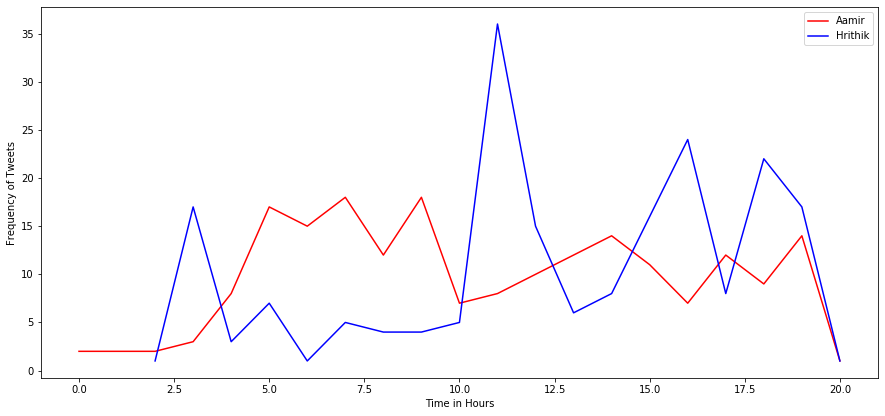

In [167]:
##Q1:Two users posting time of their tweets
y1 = aamir_tweets_df.groupby([aamir_tweets_df['created_at'].dt.hour])['tweet_id'].count()
y2 = krithik_tweets_df.groupby([krithik_tweets_df['created_at'].dt.hour])['tweet_id'].count()
plt.rcParams["figure.figsize"] = [15, 15]
plt.subplot(2,1,1)
plt.plot(y1,'r',label = 'Aamir')
plt.plot(y2,'b',label = 'Hrithik')
plt.xlabel('Time in Hours')
plt.ylabel('Frequency of Tweets')
plt.legend()
plt.show()


In [168]:
#From the plot, we can clearly see that aamir is active mostly from 3 to 9 where as Hrithik is posting more tweets from 10 to 12
#and again during 15 to 20 hours

In [169]:
##Q2: Getting the tweets URl count of two users
x = len([i for i in aamir_tweets_df['url'] if i != []])
y = len([i for i in krithik_tweets_df['url'] if i != []])
print('The URL count of Aamir tweet is :',x,'\nThe Url count of Hrithik tweets is :',y)
#Getting the Tweets with no url count of two users
x1 = len([i for i in aamir_tweets_df['url'] if i == []])
y1 = len([i for i in krithik_tweets_df['url'] if i == []])
print('The count of Non url Aamir tweet is :',x1,'\nThe count of Non Url Hrithik tweets is :',y1)

The URL count of Aamir tweet is : 92 
The Url count of Hrithik tweets is : 120
The count of Non url Aamir tweet is : 108 
The count of Non Url Hrithik tweets is : 80


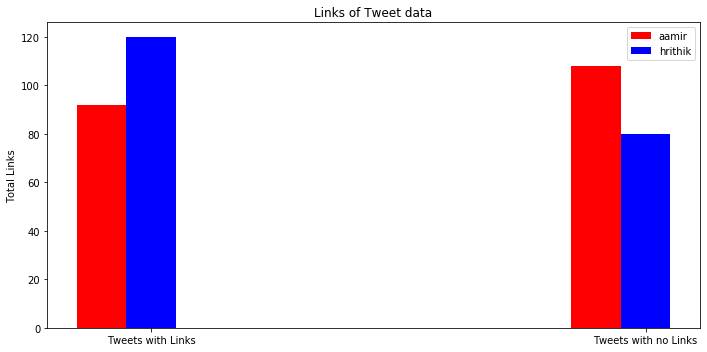

In [170]:
# Plotting the Twitter with URLs and Non URLs links of both users using bar chart
n = 2
link1 = (x,x1)
link2 = (y,y1)
bar_width = 0.1
# create plot
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax = plt.subplots()
idx = np.arange(n)
plt.bar(idx, link1, bar_width,color='r',label='aamir')
plt.bar(idx + bar_width, link2, bar_width,color='b',label='hrithik')
plt.ylabel('Total Links')
plt.title('Links of Tweet data')
plt.xticks(idx + bar_width, ('Tweets with Links', 'Tweets with no Links'))
plt.legend()
plt.tight_layout()
plt.show()

In [171]:
#From the plot, We can clearly see that both the users are using URL links 
#but Hrithik count of URL links is higher compared to Aamir.

In [172]:
##Q3:Getting the count of Hashtags used in each tweet and total count of both the users
hashtag_aamir = aamir_tweets_df.text.str.count("#")
hashtag_hrithik = krithik_tweets_df.text.str.count("#")
print('Aamir Total Hashtag count is:',aamir_tweets_df.text.str.count("#").sum())
print('Hrithik Totl Hashtag Count is:',krithik_tweets_df.text.str.count("#").sum())

Aamir Total Hashtag count is: 128
Hrithik Totl Hashtag Count is: 131


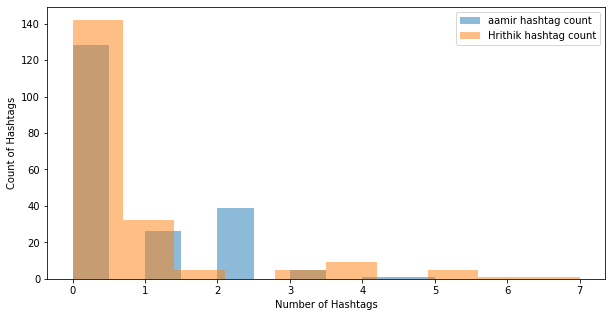

In [173]:
#Plotting the histogram of hashtags per tweet along with their count
plt.hist(hashtag_aamir, alpha=0.5, label='aamir hashtag count')
plt.hist(hashtag_hrithik, alpha=0.5, label='Hrithik hashtag count')
plt.xlabel('Number of Hashtags')
plt.ylabel('Count of Hashtags')
plt.legend(loc='upper right')
plt.show()

In [174]:
#The histogram helps us to find the Number of Hashtags used by both the users.Hrithik and Aamir have more tweets without tags where
#as Aamir is mostly using 2 hashtags followed by 1. Hrithik is using mostly 1 hashtag followed by 4 and 5 hasgtags.
#Both the users are using approximately equal number of Hashtags

In [175]:
#Taking the tweet text of both the users as a list
aamir_tweet = list(aamir_tweets_df['text'])
Hrithik_tweet = list(krithik_tweets_df['text'])

In [176]:
#Function to clean the tweet text and getting only the words
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [177]:
#assigning the clean tweet text using function
aamir_txt = [remove_url(t) for t in aamir_tweet]
hrithik_txt = [remove_url(t) for t in Hrithik_tweet]

In [178]:
#Getting the all Unique words of tweets from both users using split Function
Aamir_words = [t.lower().split() for t in aamir_txt]
Hrithik_words = [t.lower().split() for t in hrithik_txt]

In [179]:
##Q4: Getting the 20 most frequently used mords of Aamir and Hrithik
aamir_twt = list(itertools.chain(*Aamir_words))
Hrithik_twt = list(itertools.chain(*Hrithik_words))
count1 = collections.Counter(aamir_twt)
count2 = collections.Counter(Hrithik_twt)
print(count1.most_common(20))
print(count2.most_common(20))

[('the', 112), ('a', 92), ('of', 85), ('to', 77), ('and', 76), ('you', 69), ('for', 53), ('love', 52), ('i', 35), ('in', 33), ('all', 33), ('is', 30), ('thank', 28), ('my', 27), ('with', 26), ('happy', 26), ('very', 26), ('katrinakaif', 25), ('tohthefilm', 24), ('srbachchan', 23)]
[('you', 120), ('the', 89), ('thank', 70), ('to', 58), ('for', 51), ('and', 48), ('on', 47), ('a', 44), ('of', 41), ('your', 38), ('in', 33), ('war', 32), ('is', 29), ('i', 28), ('love', 28), ('yrf', 28), ('itigershroff', 26), ('at', 24), ('with', 23), ('so', 22)]


In [180]:
amr_total_words = pd.DataFrame(count1.most_common(),columns=['words', 'count'])
hrtk_total_words = pd.DataFrame(count2.most_common(),columns=['words', 'count'])

In [181]:
#taking sum of all words of Aamir and Hrithik
amr_words = amr_total_words['count'].sum()
hrtk_words = hrtk_total_words['count'].sum()
print(len(amr_total_words['count']),len(hrtk_total_words['count']))

1139 961


In [182]:
#Assigning the most common used words to dataframe 
amr_cmn_words = pd.DataFrame(count1.most_common(20),
                             columns=['words', 'count'])

hrtk_cmn_words = pd.DataFrame(count2.most_common(20),
                             columns=['words', 'count'])

In [183]:
#calculating log odd ratio
ar = [(t+1)/(amr_words+1) for t in amr_cmn_words['count']]
hr = [(t+1)/(hrtk_words+1) for t in hrtk_cmn_words['count']]
ar_total = [(t+1)/(amr_words+1) for t in amr_total_words['count']]
hr_total = [(t+1)/(hrtk_words+1) for t in hrtk_total_words['count']]
a=np.array(ar, dtype=np.float)
b=np.array(hr, dtype=np.float)
a_total=np.array(ar_total, dtype=np.float)
b_total=np.array(hr_total, dtype=np.float)
div = a/b
odd = [math.log2(i) for i in div] #For 20 common words of each user
odd_aamir = [math.log2(i) for i in a_total] #For all words of Aamir Tweets
odd_hrithik = [math.log2(i) for i in b_total] #For all words of Hrithik tweets
print('Aamir word count:',len(odd_aamir),'\n Hrithik word count:',len(odd_hrithik))
print('odd log total of Aamir all words are :\n',odd_aamir)
print('\nodd log total of Hrithik all words are \n:',odd_hrithik)

Aamir word count: 1139 
 Hrithik word count: 961
odd log total of Aamir all words are :
 [-4.828627987310582, -5.109648138617739, -5.222542195023672, -5.363404730863522, -5.3820204090308685, -5.519523932780803, -5.893919447562301, -5.920886495162571, -6.478881948283457, -6.5613441084754305, -6.5613441084754305, -6.694610639338895, -6.790825954598198, -6.841452027668166, -6.893919447562301, -6.893919447562301, -6.893919447562301, -6.948367231584678, -7.004950759951045, -7.0638444490046135, -7.125244993668757, -7.125244993668757, -7.125244993668757, -7.189375331088472, -7.189375331088472, -7.25648952694701, -7.25648952694701, -7.326878854838408, -7.326878854838408, -7.326878854838408, -7.326878854838408, -7.478881948283457, -7.5613441084754305, -7.5613441084754305, -7.5613441084754305, -7.64880694972577, -7.741916354117251, -7.741916354117251, -7.741916354117251, -7.741916354117251, -7.741916354117251, -7.741916354117251, -7.841452027668166, -7.841452027668166, -7.841452027668166, -7.948

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


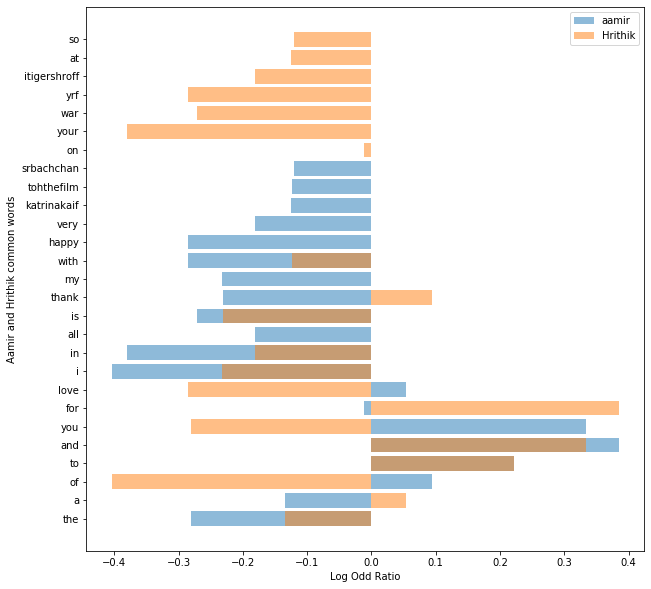

In [184]:
#plotting odd log ratio for 20 common words of Aamir and Hrithik
plt.rcParams["figure.figsize"] = [10, 10]
ax1 = plt.subplot(111)
ax1.barh(amr_cmn_words['words'],odd,alpha=0.5,label = 'aamir')
ax2 = plt.subplot(111)
ax2.barh(hrtk_cmn_words['words'],odd,alpha=0.5,label = 'Hrithik')
plt.xlabel('Log Odd Ratio')
plt.ylabel('Aamir and Hrithik common words')
plt.legend()
plt.show()

In [186]:
#From the above plot, We can clearly see that there are common words between two users with intersection between log odd ratio
#and for the same words we can see different log odd ratio as well.

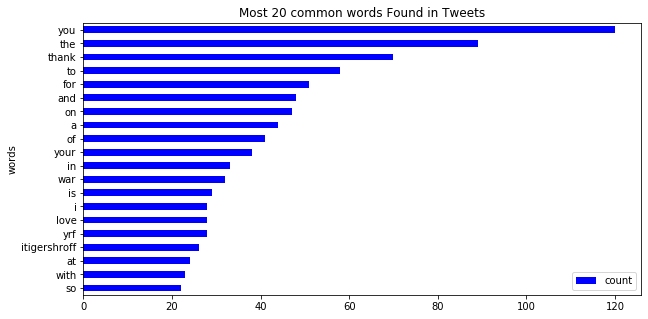

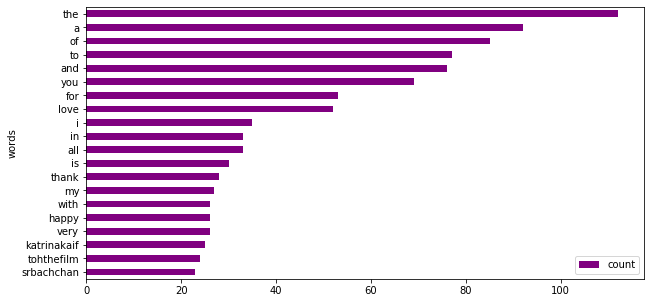

In [187]:
#Plot horizontal bar graph of 20 most commonly used words
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax = plt.subplots()
amr_cmn_words.sort_values(by='count').plot.barh(x='words',
                    color="purple",
                    label = 'Aamir 20 common words count')
hrtk_cmn_words.sort_values(by='count').plot.barh(x='words',
                     ax = ax,
                     color="blue",
                     label = 'Hrithik 20 common words count')

ax.set_title("Most 20 common words Found in Tweets")
plt.legend()
plt.show()

In [188]:
#From the plot above, Aamor and Hrithik are using 60 % same words as the most commonly used mords but differs in the users
#they are tweeting from the account

In [206]:
#Q5: Calculating the sentiment of each module using Varder sentiment module along with average compound . 
analyzer = SentimentIntensityAnalyzer()
#Sentiment analysis and compund calculation of Aamir tweets
x = []
for sentence in aamir_txt:
    vs = analyzer.polarity_scores(sentence)
    x.append(vs['compound'])
    print("{:-<65} {}\n".format(sentence, str(vs)))

Beauty is knowing you Kat Congratulations KatrinaKaif on your new beauty brand KaybyKatrinaLovea {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.91}

In this 150th birth anniversary of Baapu let us remind ourselves of what he stood for Let us revisit his writings his thoughts his books and his life English {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In this 150th birth anniversary of baapu let us remind ourselves of what he stood for Let us revisit his writings his thoughts his books and his life {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

KomalNahta------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Hey guys What an awesome trailerCheck it out--------------------- {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

RT swachhbharat The journey of 130 crore people in creating the worlds largest behaviour change Jan Andolan with one powerful war cry {'neg': 0.233, 'neu': 0.6, 'pos': 0.167, '

In [208]:
#Sentiment analysis and compund calculation of Hrithik tweets
y = []
for s in hrithik_txt:
    up = analyzer.polarity_scores(s)
    y.append(up['compound'])
    print("{:-<65} {}".format(s, str(up)))

Tune in right now iifaawards2019 catch the show of all shows on Colors TV at 8pm WizAndreTimmins {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
What about the war withinThere is no war within But then the look in his eyes gives it all awayKABIRDecodingKabir {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.6705}
He is ok with others judging him He stands by himself He stands tall Yet he nods a greet cause he still has compassion for the ones judging himKabirs thoughts when he sees NafisaKABIRDecodingKabir {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.7579}
Happy birthday hegdepooja keep shining Have a wonderful year----- {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.8126}
Beyond this place of wrath and tears looms but the horror of the shadeAnd yet the menace of the years finds and shall find me unafraidHe had heard these lines somewhere It stuck with him KABIR DecodingKabir {'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.9274}
jesselever HrithikRules

In [209]:
print('The average compound value of Aamir tweets is: ',np.mean(x))
print('The average compound value of Hrithik tweets is: ',np.mean(y))

The average compound value of Aamir tweets is:  0.41482399999999997
The average compound value of Hrithik tweets is:  0.40031150000000004
